In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import os
from astropy.io import fits
from astropy.table import Table

plt.style.use('seaborn-whitegrid')

De manera similar a lo trabajado en la clase, el propósito es realizar una gráfica de 'dec' contra 'ra' y haciendo uso de barras de color, mostrar el error en 'ra' para dos archivos diferentes.

## <strong>MzLS + BASS DR4: Number of exposures in g</strong>

In [13]:
file = '/home/mimimustaine/Downloads/survey-bricks-dr4.fits'
data = fits.open(file)

In [14]:
data.info()

Filename: /home/mimimustaine/Downloads/survey-bricks-dr4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     82   65543R x 37C   [8A, D, D, I, I, I, 6J, 6J, 6J, I, I, I, I, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 4I, 4E, E, E, E, E]   


In [15]:
data_tab = Table.read(file)
data_tab

brickname,ra,dec,nexp_g,nexp_r,nexp_z,nexphist_g [6],nexphist_r [6],nexphist_z [6],nobjs,npsf,nsimp,nexp,ndev,ncomp,psfsize_g,psfsize_r,psfsize_z,psfdepth_g,psfdepth_r,psfdepth_z,galdepth_g,galdepth_r,galdepth_z,ebv,trans_g,trans_r,trans_z,ext_g,ext_r,ext_z,wise_nobs [4],trans_wise [4],ext_w1,ext_w2,ext_w3,ext_w4
bytes8,float64,float64,int16,int16,int16,int32,int32,int32,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32
0556p332,55.67164179104478,33.25,0,0,8,0 .. 0,0 .. 0,3983213 .. 6869231,2434,1716,424,188,100,6,0.0,0.0,1.1004425,0.0,0.0,23.538174,0.0,0.0,23.158531,0.49852782,0.22860867,0.37006238,0.5734732,1.6022682,1.0793127,0.60371715,70 .. 12,0.9189849 .. 0.99583036,0.091729075,0.05633364,0.012014546,0.004536597
0557p330,55.78512396694215,33.0,0,0,6,0 .. 0,0 .. 0,3515900 .. 6151845,2308,1646,381,178,99,4,0.0,0.0,1.1277736,0.0,0.0,23.593758,0.0,0.0,23.232231,0.52838373,0.20927142,0.3486741,0.5546907,1.6982253,1.1439508,0.6398728,74 .. 12,0.9143468 .. 0.9955812,0.09722261,0.059707336,0.012734047,0.004808272
0557p335,55.7641196013289,33.5,0,0,10,0 .. 0,0 .. 0,335689 .. 8918538,3409,2322,567,297,208,15,0.0,0.0,1.0887742,0.0,0.0,23.637716,0.0,0.0,23.255789,0.5570202,0.1922626,0.3293218,0.5372537,1.7902629,1.2059488,0.6745515,73 .. 12,0.9099202 .. 0.99534225,0.102491714,0.06294328,0.013424212,0.0050688963
0559p332,55.97014925373134,33.25,0,0,10,0 .. 0,0 .. 0,8565 .. 11524237,3843,2595,694,332,210,12,0.0,0.0,1.1038291,0.0,0.0,23.541605,0.0,0.0,23.177704,0.5678372,0.18620378,0.3222946,0.53081065,1.8250288,1.2293675,0.6876509,72 .. 13,0.9082537 .. 0.995252,0.104482025,0.06416561,0.013684882,0.005167338
0560p330,56.082644628099175,33.0,0,0,6,0 .. 0,0 .. 0,3395289 .. 6321674,2243,1566,416,159,98,4,0.0,0.0,1.1525503,0.0,0.0,23.463871,0.0,0.0,23.114729,0.6161657,0.16138284,0.29268503,0.5029552,1.9803566,1.3339987,0.7461768,74 .. 12,0.9008453 .. 0.99484897,0.11337447,0.06962673,0.014849618,0.005607117
0560p335,56.06312292358804,33.5,0,0,10,0 .. 0,0 .. 0,60892 .. 9782339,3390,2384,590,256,145,15,0.0,0.0,1.0952433,0.0,0.0,23.628593,0.0,0.0,23.246819,0.5592805,0.1909805,0.32784086,0.53590095,1.7975276,1.2108423,0.6772887,73 .. 13,0.9095717 .. 0.9953234,0.10290764,0.06319869,0.01347866,0.0050894427
0562p332,56.26865671641791,33.25,0,0,9,0 .. 0,0 .. 0,1228886 .. 9607509,3287,2354,528,270,128,7,0.0,0.0,1.1371509,0.0,0.0,23.555214,0.0,0.0,23.20014,0.6339242,0.15311831,0.28250208,0.49309108,2.0374322,1.3724458,0.76768214,74 .. 13,0.8981382 .. 0.9947009,0.11664205,0.071633406,0.015277585,0.0057687135
0563p330,56.3801652892562,33.0,0,0,0,0 .. 0,0 .. 0,7450967 .. 2821842,1156,820,187,96,46,7,0.0,0.0,1.176647,0.0,0.0,23.47115,0.0,0.0,23.131964,0.6478523,0.14693359,0.27476406,0.48549005,2.0821974,1.4026,0.7845492,73 .. 13,0.89602077 .. 0.9945848,0.11920481,0.07320729,0.015613279,0.005895457
0563p335,56.36212624584718,33.5,0,0,2,0 .. 0,0 .. 0,5186227 .. 4945981,1841,1402,244,119,71,5,0.0,0.0,1.1228529,0.0,0.0,23.642653,0.0,0.0,23.275444,0.56295484,0.18891448,0.32544765,0.53370917,1.8093369,1.2187971,0.6817383,74 .. 13,0.9090055 .. 0.9952928,0.1035837,0.0636139,0.013567186,0.0051228628


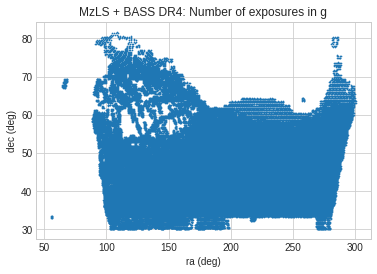

In [25]:
plt.scatter(data_tab['ra'], data_tab['dec'], s = 0.5)
plt.xlabel('ra (deg)')
plt.ylabel('dec (deg)')
plt.title('MzLS + BASS DR4: Number of exposures in g')
plt.show()

Ahora agregando la barra de color en la gráfica anterior usando como escala 'nexp_g':

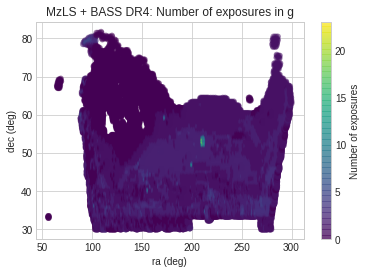

In [33]:
plt.scatter(data_tab['ra'], data_tab['dec'], 
            label = None, c = data_tab['nexp_g'], cmap = 'viridis', linewidth = 0, alpha = 0.5)
plt.axis(aspect='equal')
plt.xlabel('ra (deg)')
plt.ylabel('dec (deg)')
plt.colorbar(label = 'Number of exposures')
plt.title('MzLS + BASS DR4: Number of exposures in g')
plt.clim(min(data_tab['nexp_g']), max(data_tab['nexp_g']))

Note que con 'plt.climb()' es posible establecer el rango en el que se observa la escala de color, en el caso anterior se decidió usar desde el valor mínimo en el arreglo 'data_tab['nexp,g']', pero lo mostrado en https://www.desi.lbl.gov/imaging-surveys/ muestra una escala en [0,5], por tanto:

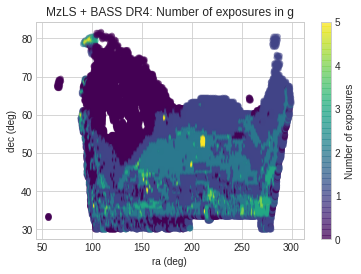

In [34]:
plt.scatter(data_tab['ra'], data_tab['dec'], 
            label = None, c = data_tab['nexp_g'], cmap = 'viridis', linewidth = 0, alpha = 0.5)
plt.axis(aspect='equal')
plt.xlabel('ra (deg)')
plt.ylabel('dec (deg)')
plt.colorbar(label = 'Number of exposures')
plt.title('MzLS + BASS DR4: Number of exposures in g')
plt.clim(0, 5)

## <strong>MzLS + BASS DR8: Number of exposures in g</strong>

Se hará uso del método en la parte anterior para mostrar la escala adecuada en el número de exposiciones.

In [38]:
file_1 = '/home/mimimustaine/Downloads/survey-bricks-dr8-south.fits'
data_tab1 = Table.read(file_1)

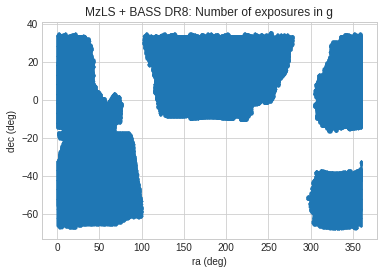

In [39]:
plt.scatter(data_tab1['ra'], data_tab1['dec'], s = 0.5)
plt.xlabel('ra (deg)')
plt.ylabel('dec (deg)')
plt.title('MzLS + BASS DR8: Number of exposures in g')
plt.show()

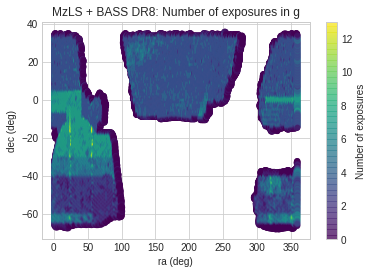

In [41]:
plt.scatter(data_tab1['ra'], data_tab1['dec'], 
            label = None, c = data_tab1['nexp_g'], cmap = 'viridis', linewidth = 0, alpha = 0.5)
plt.axis(aspect='equal')
plt.xlabel('ra (deg)')
plt.ylabel('dec (deg)')
plt.colorbar(label = 'Number of exposures')
plt.title('MzLS + BASS DR8: Number of exposures in g')
plt.clim(min(data_tab1['nexp_g']), max(data_tab1['nexp_g']))

Y el número de exposiciones en [0,5]:

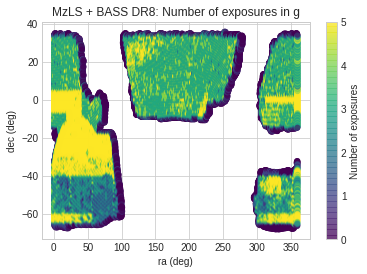

In [43]:
plt.scatter(data_tab1['ra'], data_tab1['dec'], 
            label = None, c = data_tab1['nexp_g'], cmap = 'viridis', linewidth = 0, alpha = 0.5)
plt.axis(aspect='equal')
plt.xlabel('ra (deg)')
plt.ylabel('dec (deg)')
plt.colorbar(label = 'Number of exposures')
plt.title('MzLS + BASS DR8: Number of exposures in g')
plt.clim(0, 5)